In [1]:
import pandas as  pd
import numpy as np

path = "D:\RAVI\Data Science\Datasets\Davis\Davis.csv"
df = pd.read_csv(path)

In [34]:
df.head(2)

,Unnamed: 0,sex,weight,height,repwt,repht,bmi,newbmi,bmi_def
0,1,M,77,182,77.0,180.0,23.245985,23.765432,-0.519447
1,2,F,58,161,51.0,159.0,22.375680,20.173253,2.202427


Now we are going to build a function to count the missing values in each column of the data frame

In [33]:
missing_data = df.isnull()

In [4]:
missing_data.columns.values.tolist()

['Unnamed: 0', 'sex', 'weight', 'height', 'repwt', 'repht']

In [5]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

Unnamed: 0
False    200
Name: Unnamed: 0, dtype: int64

sex
False    200
Name: sex, dtype: int64

weight
False    200
Name: weight, dtype: int64

height
False    200
Name: height, dtype: int64

repwt
False    183
True      17
Name: repwt, dtype: int64

repht
False    183
True      17
Name: repht, dtype: int64



Now we are going to drop all the rows with missing values. Note that this is not a good practice, but for the sake of simplicity in this tutorial, we are going to handle the missing values in this data set by removing the entire row. We expect to teach you more advanced methods to handle missing data in the upcoming tutorials.

In [6]:
df.dropna(subset = ['repwt'], axis = 0, inplace = True)
df.dropna(subset = ['repht'], axis = 0, inplace = True)
#df.reset_index(drop = True, inplace = True)
df.head(10)

,Unnamed: 0,sex,weight,height,repwt,repht
0,1,M,77,182,77.0,180.0
1,2,F,58,161,51.0,159.0
2,3,F,53,161,54.0,158.0
3,4,M,68,177,70.0,175.0
4,5,F,59,157,59.0,155.0
5,6,M,76,170,76.0,165.0
6,7,M,76,167,77.0,165.0
7,8,M,69,186,73.0,180.0
8,9,M,71,178,71.0,175.0
9,10,M,65,171,64.0,170.0


Now let us run our missing values function again

In [7]:
df.shape

(181, 6)

In [8]:
path = "D:\RAVI\Data Science\Datasets\davis_cleaned.csv"
df.to_csv(path)

Now that we have cleaned our data, we can jump into the analytics part

First lets get a sneak peak of our data

In [9]:
df.describe()

,Unnamed: 0,weight,height,repwt,repht
count,181.000000,181.000000,181.000000,181.000000,181.000000
mean,97.480663,66.303867,170.154696,65.679558,168.657459
std,57.857448,15.340992,12.312069,13.834220,9.394668
min,1.000000,39.000000,57.000000,41.000000,148.000000
25%,46.000000,56.000000,164.000000,55.000000,161.000000
50%,96.000000,63.000000,169.000000,63.000000,168.000000
75%,146.000000,75.000000,178.000000,74.000000,175.000000
max,200.000000,166.000000,197.000000,124.000000,200.000000


Male and Female Percentage

In [10]:
import matplotlib.pyplot as plt
df["sex"].value_counts().plot.pie()
plt.gca().set_aspect("equal")

Majority of the persons who participated in the survey are females

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000263F3304CC0>]],
      dtype=object)

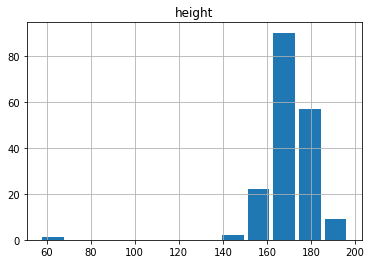

In [11]:
df.hist(column = 'height', rwidth = 0.85, bins = 12)

Now we will subset males from the dataset to some descriptive analysis 

First we have to create 2 dataframes subsetting males and females

In [26]:
mdf = df[df.sex == 'M']
fdf = df[df.sex == 'F']

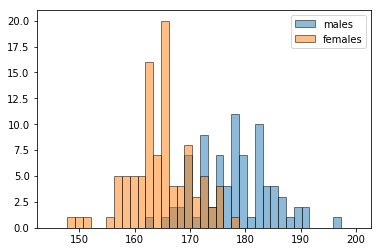

In [13]:
from matplotlib import pyplot

bins = np.linspace(145, 200, 40)

pyplot.hist(mdf['height'], bins, alpha=0.5, label='males', edgecolor = 'black')
pyplot.hist(fdf['height'], bins, alpha=0.5, label='females', edgecolor = 'black')
pyplot.legend(loc='upper right')
pyplot.show()

Distribution of Weights in Males and females

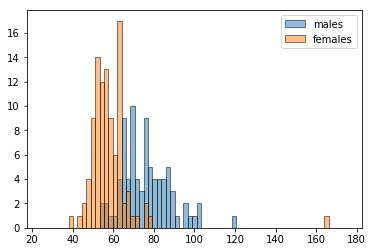

In [14]:
bins = np.linspace(25, 175, 70)

pyplot.hist(mdf['weight'], bins, alpha=0.5, label='males', edgecolor = 'black')
pyplot.hist(fdf['weight'], bins, alpha=0.5, label='females', edgecolor = 'black')
pyplot.legend(loc='upper right')
pyplot.show()

It turns out that Males and Females have approximately similar weights. But if you look deeper, it can be concluded that men are heavier. There are some extreme data as well.

Now we are going to calculate BMI for each and every individual  and append that column to our initial data frame

In [15]:
df['bmi']=df['weight']/((0.01*df['height'])*(0.01*df['height']))
df.head(1)

,Unnamed: 0,sex,weight,height,repwt,repht,bmi
0,1,M,77,182,77.0,180.0,23.245985


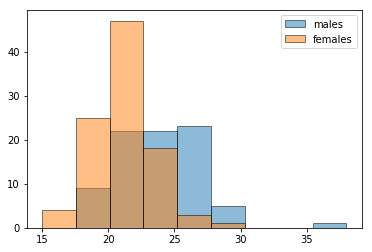

In [18]:
bins = np.linspace(15, 38, 10)

pyplot.hist(mdf['bmi'], bins, alpha=0.5,  label='males', edgecolor = 'black')
pyplot.hist(fdf['bmi'], bins, alpha=0.5,  label='females', edgecolor = 'black')
pyplot.legend(loc='upper right')
pyplot.show()

A BMI value between 20-24 is normal. From the above histogram, it is visible that majority of women have a normal  BMI and there are considerable no. of men who are over weight.

Now  let us calculate the BMI based on the reported height and weight values

In [23]:
df['newbmi'] = df['repwt']/((0.01*df['repht'])*(0.01*df['repht'])) 

In [24]:
df['bmi_def'] = df['bmi'] - df['newbmi']

In [25]:
df.head(2)

,Unnamed: 0,sex,weight,height,repwt,repht,bmi,newbmi,bmi_def
0,1,M,77,182,77.0,180.0,23.245985,23.765432,-0.519447
1,2,F,58,161,51.0,159.0,22.375680,20.173253,2.202427


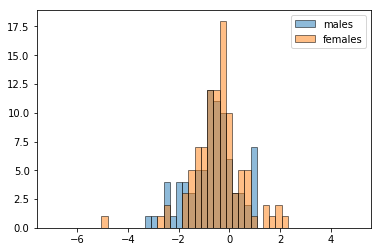

In [32]:
bins = np.linspace(-7, 5, 50)

pyplot.hist(mdf['bmi_def'],bins,  alpha=0.5,  label='males', edgecolor = 'black')
pyplot.hist(fdf['bmi_def'],bins,  alpha=0.5,  label='females', edgecolor = 'black')
pyplot.legend(loc='upper right')
pyplot.show()